# Case Study 2: 

Time Series Forecasting of sales data

Develop a Time Series model using SARIMA that can forecast future sales for a given business based on historical data. 

The model should be able to identify patterns and trends in the data, consider any seasonality or trends, and make predictions for future 2 years.

Dataset: time_series_revenue.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('time_series_revenue.csv')

In [6]:
data

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
...,...,...
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413


In [8]:
data.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72': 'Sales'}, inplace=True)
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

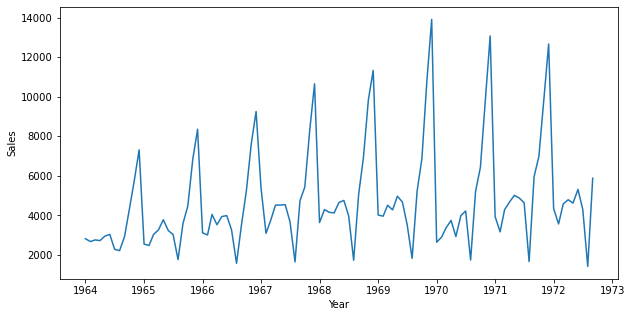

In [9]:
plt.figure(figsize=(10,5))
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.833593
p-value: 0.363916
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584


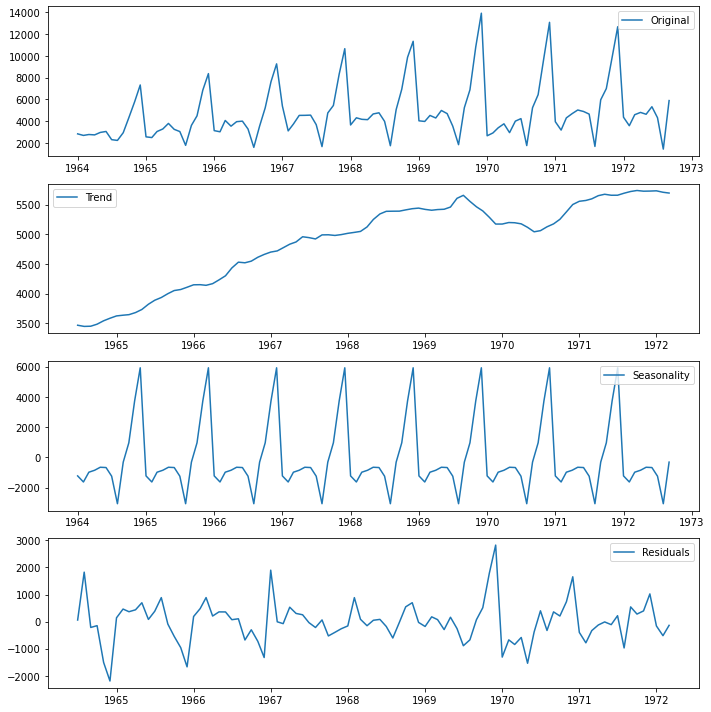

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data, period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
